# 4. Evaluation Metrics for Classification
In the previous session we trained a model for predicting churn. How do we know if it's good?
## 4.1 Evaluation metrics: session overview
Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Metric - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
data_url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [4]:
#!wget $data_url -O data-week-3.csv

In [5]:
df = pd.read_csv('data-week-3.csv')

In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [8]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)
df.churn = (df.churn == 'yes').astype(int)

In [9]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [10]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [11]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [12]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [13]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [14]:
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [15]:
dv = DictVectorizer(sparse=False)

In [16]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/artemnikolaev/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)

In [19]:
(y_val == churn_decision).mean()

0.8034066713981547

# Accuracy and dummy model

In [20]:
# accuracy = frequency of correct prediction or fraction of correct prediction

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

In [23]:
thresholds = np.linspace(0, 1, 21)
scores = []

for t in thresholds:
    #churn_decision = (y_pred >= t)
    #print('%.2f %.3f' % (t, (y_val == churn_decision).mean()))
    #scores.append((y_val == churn_decision).mean())
    score = accuracy_score(y_val, y_pred >= t)
    scores.append(score)

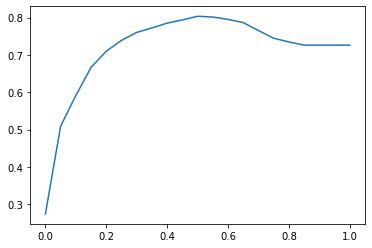

In [24]:
plt.plot(thresholds, scores)

In [25]:
from collections import Counter

In [26]:
Counter(y_pred >= 1)

Counter({False: 1409})

In [27]:
Counter(y_val)[0]/sum(Counter(y_val).values())

0.7260468417317246

In [28]:
y_val.mean(), 1 - y_val.mean()

(0.2739531582682754, 0.7260468417317246)

In [29]:
# here we see class embalance, so score is good in start for dummy model
(1-y_val.mean())/y_val.mean() # 2.6 : 1 

2.650259067357513

# Confusion table
- diffrent types of errors and correct decisions
- Arranging them in table

In [30]:
# we want to have metrics which isn't affected with class embalance

Diffrent results:
- true possitive
- true negative
- false positive (we think that it's positive but it's negative)
- false negative

In [31]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [32]:
t = 0.5
predicted_positive = (y_pred >= t)
predicted_negative = (y_pred < t)

In [33]:
tp = (actual_positive & predicted_positive).sum()
tn = (actual_negative & predicted_negative).sum()
fp = (actual_negative & predicted_positive).sum()
fn = (actual_positive & predicted_negative).sum()

In [34]:
tp/len(y_val)

0.149041873669269

In [35]:
(actual_positive & predicted_positive).mean()

0.149041873669269

In [36]:
(actual_positive & predicted_negative).mean()

0.12491128459900638

In [37]:
(actual_negative & predicted_positive).mean()

0.0716820440028389

In [38]:
(actual_negative & predicted_negative).mean()

0.6543647977288858

In [39]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

In [40]:
normalized_confusion_matrix = (confusion_matrix/confusion_matrix.sum()).round(2)

In [41]:
normalized_confusion_matrix

array([[0.65, 0.07],
       [0.12, 0.15]])

# Precision and Recall

In [42]:
#acc = 
(tp + tn)/(tp+tn+fn+fp)

0.8034066713981547

In [43]:
# precision = how many positive precision turn out to be correct
# fraction of correct positive predictions

In [44]:
precision = tp / (tp + fp)

In [45]:
precision

0.6752411575562701

In [46]:
# recall - positive examples that we identified correctly
recall = tp / (tp + fn)

In [47]:
recall

0.5440414507772021

# ROC = receiver operating characteristic 
# ROC CURVES

## TPR & FPR

In [48]:
FPR  = fp / (fp + tn)

In [49]:
FPR

0.09872922776148582

In [50]:
TPR = tp / (tp + fn)

In [51]:
TPR # same as recall

0.5440414507772021

In [52]:
# we want to minimize FPR and maximize TPR
# ROC bases on two values

In [53]:
tresholds = np.linspace(0, 1, 101)
scores = []
for t in tresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predicted_positive = (y_pred >= t)
    predicted_negative = (y_pred < t)
    tp = (actual_positive & predicted_positive).sum()
    tn = (actual_negative & predicted_negative).sum()
    fp = (actual_negative & predicted_positive).sum()
    fn = (actual_positive & predicted_negative).sum()
    
    scores.append((t, tp, fp, fn, tn))


In [54]:
columns = ['treshold', 'tp', 'fp', 'fn', 'tn' ]
df_scores = pd.DataFrame(scores, columns = columns)

In [55]:
df_scores[::10]#each tens record

,treshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,210,101,176,922
60,0.6,150,53,236,970
70,0.7,75,20,311,1003
80,0.8,13,1,373,1022
90,0.9,0,0,386,1023


In [56]:
df_scores['TPR'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['FPR']  = df_scores.fp / (df_scores.fp + df_scores.tn)

In [57]:
df_scores[::10]

,treshold,tp,fp,fn,tn,TPR,FPR
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,75,20,311,1003,0.194301,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


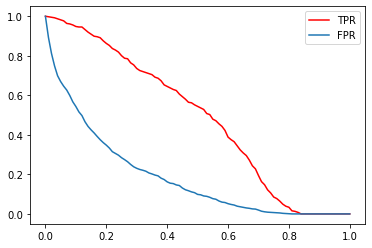

In [58]:
plt.plot(df_scores.treshold, df_scores.TPR, color = 'red', label = 'TPR')
plt.plot(df_scores.treshold, df_scores.FPR, label = 'FPR')
plt.legend()# we want to compare, hard to understand something from this graph
plt.show()

# Random model

In [59]:
np.random.seed(1)
y_rand = np.random.uniform(0,1 ,size = len(y_val))

In [60]:
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [61]:
((y_rand >= 0.5) == y_val).mean() # acc of this model

0.5017743080198722

In [62]:
def tpr_fpr(y_val, y_pred):
    tresholds = np.linspace(0, 1, 101)
    scores = []
    for t in tresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        predicted_positive = (y_pred >= t)
        predicted_negative = (y_pred < t)
        tp = (actual_positive & predicted_positive).sum()
        tn = (actual_negative & predicted_negative).sum()
        fp = (actual_negative & predicted_positive).sum()
        fn = (actual_positive & predicted_negative).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['treshold', 'tp', 'fp', 'fn', 'tn' ]
    df_scores = pd.DataFrame(scores, columns = columns)
    df_scores['TPR'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['FPR']  = df_scores.fp / (df_scores.fp + df_scores.tn)
    return df_scores

In [63]:
df_rand = tpr_fpr(y_val, y_rand)

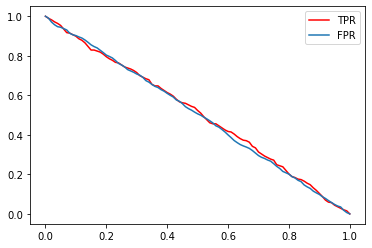

In [64]:
plt.plot(df_rand.treshold, df_rand.TPR, color = 'red', label = 'TPR')
plt.plot(df_rand.treshold, df_rand.FPR, label = 'FPR')
plt.legend()# we want to compare, hard to understand something from this graph
plt.show()

# Ideal model

In [65]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

In [66]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal_predictions = np.linspace(0, 1, len(y_val))

In [67]:
df_ideal = tpr_fpr(y_ideal, y_ideal_predictions)

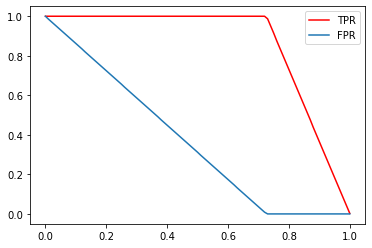

In [68]:
plt.plot(df_ideal.treshold, df_ideal.TPR, color = 'red', label = 'TPR')
plt.plot(df_ideal.treshold, df_ideal.FPR, label = 'FPR')
plt.legend()# we want to compare, hard to understand something from this graph
plt.show()

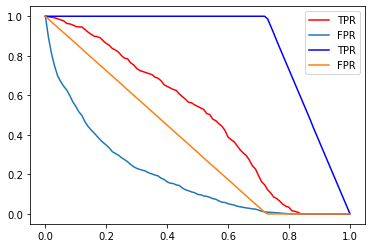

In [69]:
plt.plot(df_scores.treshold, df_scores.TPR, color = 'red', label = 'TPR')
plt.plot(df_scores.treshold, df_scores.FPR, label = 'FPR')
# plt.plot(df_rand.treshold, df_rand.TPR, color = 'black', label = 'TPR')
# plt.plot(df_rand.treshold, df_rand.FPR, label = 'FPR')
plt.plot(df_ideal.treshold, df_ideal.TPR, color = 'blue', label = 'TPR')
plt.plot(df_ideal.treshold, df_ideal.FPR, label = 'FPR')
plt.legend()# we want to compare, hard to understand something from this graph
plt.show()

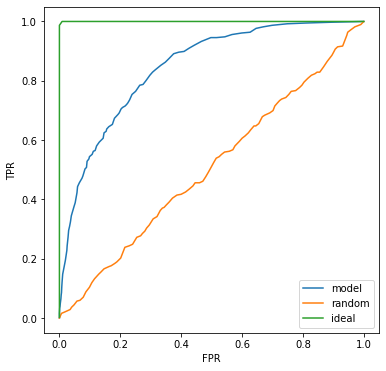

In [70]:
plt.figure(figsize=(6,6))
plt.plot(df_scores.FPR, df_scores.TPR, label = 'model')
plt.plot(df_rand.FPR, df_rand.TPR, label = 'random')
plt.plot(df_ideal.FPR, df_ideal.TPR, label = 'ideal')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

In [71]:
from sklearn.metrics import roc_curve

In [72]:
fpr, tpr, tresholds = roc_curve(y_val, y_pred)

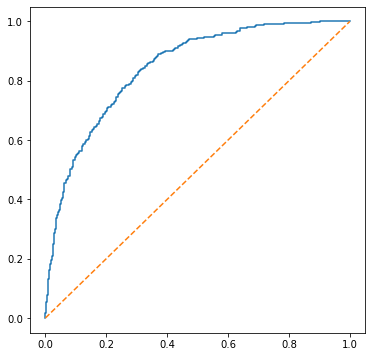

In [73]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0,1], linestyle ='--')

# ROC AUC
- Area under ROC curve - usefull metric
- Interpretetion of AUC

In [74]:
from sklearn.metrics import auc # can compute area under any cruve

In [75]:
auc(fpr, tpr)

0.8438403760148705

In [76]:
auc(df_rand.FPR, df_rand.TPR)

0.5060233793728696

In [77]:
auc(df_ideal.FPR, df_ideal.TPR)

0.9999430203759136

In [78]:
 from sklearn.metrics import roc_auc_score

In [79]:
roc_auc_score(y_val, y_pred)

0.8438403760148705

In [80]:
# AUC = prop of randomly selected positive example has more score than prob of randomly selected neg example

# K-FOLD validation

In [119]:
def train(df_train, y_train, C = 1.0):
    dicts = df_train[categorical + numerical].to_dict(orient = 'records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [120]:
dv, model = train(df_train,y_train)

In [121]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient = 'records')
    
    X = dv.transform(dicts)
    
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [122]:
y_pred = predict(df_val, dv, model)

In [123]:
from sklearn.model_selection import KFold

In [124]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [125]:
train_idx, val_idx = next(kfold.split(df_full_train))

In [126]:
len(train_idx), len(val_idx)

(5070, 564)

In [127]:
#!pip install tqdm

In [128]:
from tqdm.auto imporat tqdm

In [148]:
n_splits = 10
for c in tqdm([0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]):    
    scores = []
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    for train_idx, val_idx in \
    kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, c)
        y_pred = predict(df_val, dv, model)

        scores.append(roc_auc_score(y_val, y_pred))
    print('C = %s %.3f +- %.3f' % (c, np.mean(scores), 3 * np.std(scores)))

  0%|          | 0/8 [00:00<?, ?it/s]

C = 0.0001 0.811 +- 0.036
C = 0.001 0.826 +- 0.037
C = 0.01 0.841 +- 0.037
C = 0.1 0.841 +- 0.036
C = 0.5 0.841 +- 0.033
C = 1 0.840 +- 0.038
C = 5 0.841 +- 0.036
C = 10 0.841 +- 0.036


In [145]:
# we want train or final model and evaluate on final df_test

In [146]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)

y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)

auc

0.8572386167896259